# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gdown

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, LearningCurveDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [150]:
DRIVE_LINK = 'https://drive.google.com/file/d/1M0q5i728vHV5otURorfYNh-hTDJOm6LN/view?usp=sharing'
def fetch_clustered_data(drive_link=DRIVE_LINK):
  drive_link = drive_link
  file_id = drive_link.split('/')[-2]
  download_link = f'https://drive.google.com/uc?id={file_id}'

  gdown.download(download_link, 'clustering.csv')
  print(f'\nsuccessfull download {download_link}')

  df = pd.read_csv('clustering.csv', encoding='utf-8', index_col=0)
  return df

In [151]:
df_clustered = fetch_clustered_data()

Downloading...
From: https://drive.google.com/uc?id=1M0q5i728vHV5otURorfYNh-hTDJOm6LN
To: /content/clustering.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 41.3MB/s]


successfull download https://drive.google.com/uc?id=1M0q5i728vHV5otURorfYNh-hTDJOm6LN


In [152]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hours_studied                   6378 non-null   float64
 1   attendance                      6378 non-null   float64
 2   parental_involvement            6378 non-null   int64  
 3   access_to_resources             6378 non-null   int64  
 4   sleep_hours                     6378 non-null   float64
 5   previous_scores                 6378 non-null   float64
 6   motivation_level                6378 non-null   int64  
 7   tutoring_sessions               6378 non-null   float64
 8   family_income                   6378 non-null   int64  
 9   teacher_quality                 6378 non-null   int64  
 10  physical_activity               6378 non-null   float64
 11  parental_education_level        6378 non-null   int64  
 12  distance_from_home              6378 no

In [153]:
df_clustered.head()

,hours_studied,attendance,parental_involvement,access_to_resources,sleep_hours,previous_scores,motivation_level,tutoring_sessions,family_income,teacher_quality,...,internet_access_No,internet_access_Yes,learning_disabilities_No,learning_disabilities_Yes,peer_influence_Negative,peer_influence_Neutral,peer_influence_Positive,school_type_Private,school_type_Public,cluster
0,0.511628,0.600,0,2,0.500000,0.46,0,0.000,0,1,...,0,1,1,0,0,0,1,0,1,3
1,0.418605,0.100,0,1,0.666667,0.18,0,0.250,1,1,...,0,1,1,0,1,0,0,0,1,4
2,0.534884,0.950,1,1,0.500000,0.82,1,0.250,1,1,...,0,1,1,0,0,1,0,0,1,7
3,0.651163,0.725,0,1,0.666667,0.96,1,0.125,1,1,...,0,1,1,0,1,0,0,0,1,1
4,0.418605,0.800,1,1,0.333333,0.30,1,0.375,1,2,...,0,1,1,0,0,1,0,0,1,4


<Axes: xlabel='cluster', ylabel='count'>

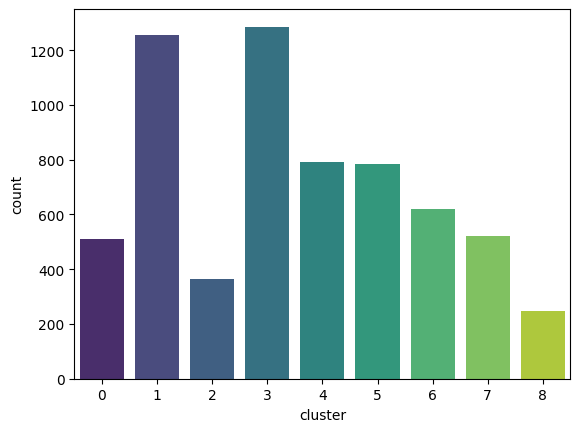

In [154]:
sns.countplot(x='cluster', data=df_clustered, palette='viridis')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [155]:
X = df_clustered.drop(['cluster'], axis=1)
y = df_clustered['cluster']

print(f'shape of features: {X.shape}')
print(f'shape of target: {y.shape}')

shape of features: (6378, 30)
shape of target: (6378,)


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

portion_train = X_train.shape[0] / X.shape[0]
portion_test = X_test.shape[0] / X.shape[0]

print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')
print(f'percentage of train size: {portion_train:.2f}%')
print(f'percentage of test size: {portion_test:.2f}%')


shape of X_train: (5102, 30)
shape of y_train: (5102,)
shape of X_test: (1276, 30)
shape of y_test: (1276,)
percentage of train size: 0.80%
percentage of test size: 0.20%


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [157]:
knn = KNeighborsClassifier()
lr = LogisticRegression(multi_class='ovr')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
nb = MultinomialNB()

knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

models = [knn, lr, dt, rf, svm, nb]
models

[KNeighborsClassifier(),
 LogisticRegression(multi_class='ovr'),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 SVC(),
 MultinomialNB()]

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Algoritma yang akan digunakan berjumlah 6 jenis, untuk melihat perbandingan-perbandingan yang lebih baik pada akurasinya. 6 Jenis teresbut antara lain:
1. `KNN`: Merupakan algoritma yang mengukur jarak antara titik prediksi dengan tetangga2 terdekatnya untuk mengidentifikasi kemiripan dan kelompok dari suatu titik, jenis algoritma in mudah untuk diintrepertasikan dan memungkinkan memakan memori lebih jika terlalu banyak data yang dilatih
2. `LogisticRegression`: Merupakan jenis algoritma yang mengklasifikasi hasil prediksi dengan nilai probabilitas antara 0 - 1, nilai *true* jika nilai probabilitas diatas nilai threshold yang ditentukan. Untuk model jenis ini digunakan parameter `multi_class = ovr` atau one vs rest. dengan membandingkan nilai binary antara satu kelas dan kelas yg lainnya yang bukan dari kelas tersebut.
3. `DecisionTreeClassifier`: Jenis Algoritma dengan memecah fitur menjadi 2 pilihan, dengan mengukur nilai impurity di setiap fitur. Sehingga menjadikan seperti bentuk pohon keputusan
4. `RandomForestClassifier`: Jenis gabungan dari algoritma decision tree dengan memilih random dari pada sub-tree.
5. `SVM`: Jenis algoritma yang memisahkan antar kelas dengan garis hyperplane yang memaksimalkan margin antara garis dan support vektor (titik terdekat dengan hyperplane dari setiap kelas)
6. `Naive Bayes`: jenis algoritma yang berdasarkan probabilitas teorema bayes. Dengan mengasumsikan fitur yang indpenden satu sama lain.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

,Model,Accuracy,F1 Score
0,KNeighborsClassifier,0.764107,0.757316
1,LogisticRegression,0.997649,0.997648
2,DecisionTreeClassifier,1.000000,1.000000
3,RandomForestClassifier,1.000000,1.000000
4,SVC,1.000000,1.000000
5,MultinomialNB,0.721003,0.659819


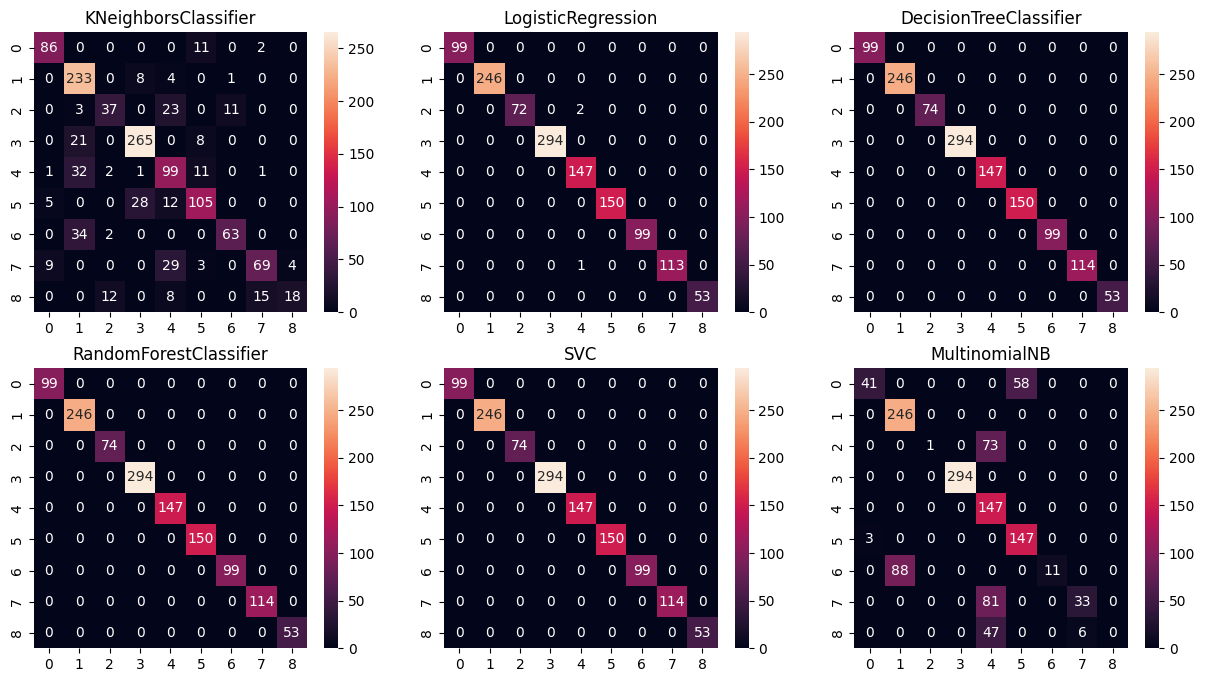

In [158]:
def model_evaluate(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  cm = confusion_matrix(y_test, y_pred)

  return accuracy, f1, cm


model_names = []
accuracies = []
f1_scores = []
cms = []

for model in models:
  accuracy, f1, cm = model_evaluate(model, X_test, y_test)
  model_names.append(model.__class__.__name__)
  accuracies.append(accuracy)
  f1_scores.append(f1)
  cms.append(cm)


evals = pd.DataFrame({'Model': model_names,
                      'Accuracy': accuracies,
                      'F1 Score': f1_scores})


ncols = 3
nrows = len(evals) // ncols
fig, axes = plt.subplots(figsize=(15,4*nrows), nrows=nrows, ncols=ncols)
axes = axes.flatten()

for i, ax in enumerate(axes):
  sns.heatmap(cms[i], annot=True, fmt='d', ax=ax)
  ax.set_title(model_names[i], fontsize=12)

evals

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya. <br><br>

**EVALUASI** <br>
Evaluasi dari 6 algoritma diatas menunjukkan keunggulan pada algoritma `Decision Tree`, `RandomForestClassifier`, dan `SVM`. Dengan mengatur semua parameter pada default value.

**STRATEGY**
Dari hasil diatas pembuatan model saat ini akan menggunakan SVM, karena dataset yang digunakan telah di normalisasikan skalanya

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [159]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [160]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [161]:
from sklearn.metrics import recall_score, precision_score

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')

print(f'train set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'test set accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

train set accuracy: 1.0
test set accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [162]:
train_size, train_score, test_score = learning_curve(svm, X_train, y_train, scoring='accuracy', cv=2, verbose=3)

[learning_curve] Training set sizes: [ 255  829 1403 1977 2551]
[CV] END ..................., score=(train=0.965, test=0.805) total time=   0.1s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.5s
[CV] END ..................., score=(train=0.996, test=0.922) total time=   0.1s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=1.000) total time=   0.5s


In [163]:
train_size, train_score, test_score

(array([ 255,  829, 1403, 1977, 2551]),
 array([[0.96470588, 0.99607843],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ]]),
 array([[0.80478244, 0.92238338],
        [1.        , 0.999608  ],
        [1.        , 0.999608  ],
        [1.        , 0.999608  ],
        [1.        , 1.        ]]))

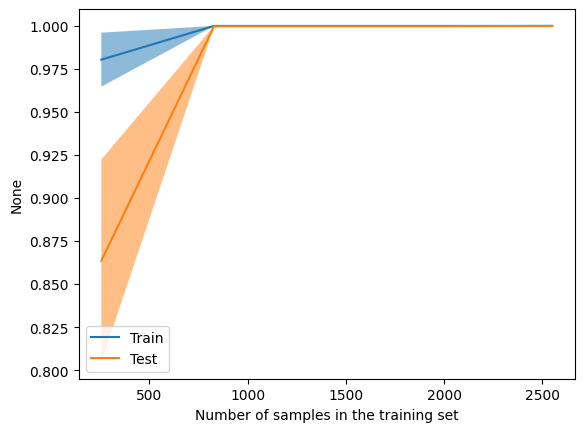

In [164]:
LearningCurveDisplay(train_sizes=train_size, train_scores=train_score, test_scores=test_score).plot()

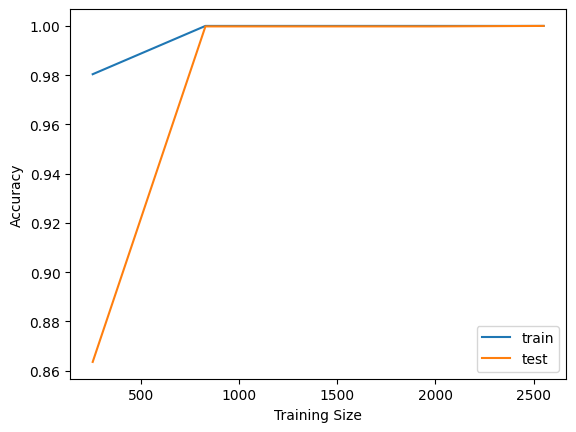

In [165]:
train_score = np.mean(train_score, axis=1)
test_score = np.mean(test_score, axis=1)

plt.plot(train_size, train_score, label='train')
plt.plot(train_size, test_score, label='test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Display grafik yang menunjukkan tidak ada nya overfit atau underfit pada model, mengidentifikasikan model yang memprediksi data secara baik dan dapat di generalisasikan dengan data yang baru